## 1. Importing Library

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df = pd.read_pickle(r'C:\Users\casbacar\Documents\Study\Data Immersion\Achievement 4\03_2025_Instacart basked analysis\02 Data\Prepared data\Customers_prods_final.pkl')

In [3]:
df.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,days_since_prior_order,add_to_cart_order,reordered,_merge,Busiest days,Busiest hours,max_order,loyalty_flag,spending_flag,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,0,both,Busiest days,Fewer orders,8,New customer,Low spender,Non-frequent customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,11.0,1,1,both,Regularly busy,Most orders,8,New customer,Low spender,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,10.0,2,1,both,Busiest days,Most orders,8,New customer,Low spender,Frequent customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,NaN,1,0,both,Regularly busy,Fewer orders,8,New customer,Low spender,19.0
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,1,both,Least busy days,Fewer orders,8,New customer,Low spender,Non-frequent customer


In [4]:
# We remove any PII from the data set

df_neutral = df.drop(['First Name','Surname','Gender','Age'], axis = 1)

In [17]:
# Create a Region column based on the State column

result = []

for value in df["State"]:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']:
        result.append("New England")
    elif value in ['New York', 'Pennsylvania', 'New Jersey']:
        result.append("Middle Atlantic")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio']:
        result.append("East North Central")
    elif value in ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("West North Central")
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']:
        result.append("South Atlantic")
    elif value in ['Kentucky', 'Tennessee', 'Mississippi', 'Alabama']:
        result.append("East South Central")
    elif value in ['Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append("West South Central")
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']:
        result.append("Mountain")
    elif value in ['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append("Pacific")

In [18]:
# Add the Region column to the dataframe with all the new values

df['Region'] = result

In [7]:
df['Region'] = result

In [8]:
df_neutral.head()

,user_id,State,date_joined,n_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,...,add_to_cart_order,reordered,_merge,Busiest days,Busiest hours,max_order,loyalty_flag,spending_flag,frequency_flag,Region
0,26711,Missouri,1/1/2017,3,married,165665,196,Soda,77,7,...,2,0,both,Busiest days,Fewer orders,8,New customer,Low spender,Non-frequent customer,West North Central
1,26711,Missouri,1/1/2017,3,married,165665,196,Soda,77,7,...,1,1,both,Regularly busy,Most orders,8,New customer,Low spender,Regular customer,West North Central
2,26711,Missouri,1/1/2017,3,married,165665,196,Soda,77,7,...,2,1,both,Busiest days,Most orders,8,New customer,Low spender,Frequent customer,West North Central
3,26711,Missouri,1/1/2017,3,married,165665,6184,Clementines,32,4,...,1,0,both,Regularly busy,Fewer orders,8,New customer,Low spender,19.0,West North Central
4,26711,Missouri,1/1/2017,3,married,165665,6184,Clementines,32,4,...,2,1,both,Least busy days,Fewer orders,8,New customer,Low spender,Non-frequent customer,West North Central


In [9]:
# create a subset for experimenting

df_neutral_t = df_neutral[:1000]

In [10]:
# Checking the spending_flag per region 

df_neutral.groupby('Region')['spending_flag'].value_counts()


Region              spending_flag
East North Central  Low spender      2124758
                    Big spender      1022903
East South Central  Low spender      1705339
                    Big spender       815702
Middle Atlantic     Low spender      1305866
                    Big spender       624891
Mountain            Low spender      3432042
                    Big spender      1650415
New England         Low spender      2564447
                    Big spender      1227532
Pacific             Low spender      2171079
                    Big spender      1039377
South Atlantic      Low spender      3851671
                    Big spender      1853414
West North Central  Low spender      3005527
                    Big spender      1444137
West South Central  Low spender      1728050
                    Big spender       837709
Name: count, dtype: int64

In [11]:
df_neutral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 27 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   State                   object  
 2   date_joined             object  
 3   n_dependants            int64   
 4   fam_status              object  
 5   income                  int64   
 6   product_id              int64   
 7   product_name            object  
 8   aisle_id                int64   
 9   department_id           int64   
 10  prices                  float64 
 11  order_id                int64   
 12  eval_set                object  
 13  order_number            int64   
 14  order_dow               int64   
 15  order_hour_of_day       int64   
 16  days_since_prior_order  float64 
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  _merge                  category
 20  Busiest days            object  
 21  Busies

In [12]:
# We create profiles for customers with more and less than 5 orders 
df_neutral.loc[df_neutral['order_number'] < 5, 'Low Spender'] = 'Exclude'

In [13]:
df_neutral.loc[df_neutral['order_number'] >= 5, 'Big Spender'] = 'Include'


In [14]:
# Now we exclude the customers with less than 5 orders

df_high_spenders = df_neutral[df_neutral['Low Spender'] != 'Exclude']

In [15]:
# We export a csv file containing data for customers with more than 5 orders
df_high_spenders.to_csv(r'C:\Users\casbacar\Documents\Study\Data Immersion\Achievement 4\03_2025_Instacart basked analysis\03 Scripts\Prepared data\4.10_high_spenders_only.csv')


KeyboardInterrupt



In [18]:
df_high_spenders.shape

(24414877, 29)

## 2. Data grouping

In [6]:
# Customer profiling: Using the original dataframe we create age groups to start defining our customer profiles
df.loc[df['Age'] <= 30, 'Age groups'] = '<30'
df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age groups'] = '30-40'
df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age groups'] = '40-50'
df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age groups'] = '50-60'
df.loc[(df['Age'] > 60) & (df['Age'] <= 70), 'Age groups'] = '60-70'
df.loc[(df['Age'] > 70) & (df['Age'] <= 81), 'Age groups'] = '70-81'


In [20]:
# Checking different stats for determining what income level defines each age group. The 75th percentaile
df.groupby('Age groups')['income'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
Age groups,,,,,,,,
30-40,5070687.0,70603.0,25522.0,25903.0,56265.0,68848.0,84471.0,397929.0
40-50,5092179.0,116403.0,43709.0,29017.0,96036.0,116516.0,143492.0,592409.0
50-60,5059795.0,115071.0,41860.0,29018.0,95220.0,115894.0,143129.0,591089.0
60-70,5004669.0,115696.0,41778.0,29001.0,95329.0,116126.0,143537.0,577728.0
70-81,5578170.0,115707.0,42800.0,29008.0,95536.0,115991.0,143082.0,593901.0
<30,6599359.0,70435.0,24484.0,25937.0,56038.0,69196.0,84710.0,396364.0


In [7]:
# Next we'll create a series of customer profiles based on age, income and certain goods. 

df.loc[(df['Age groups'].isin(['<30'])) & (df['income'] > 35742) & (df['income'] < 133678) & (df['department_id'].isin([4,1,7])) & (df['n_dependants'] <= 0), 'profile'] = 'Single young adults'
df.loc[(df['Age groups'].isin(['30-40','40-50'])) & (df['income'] > 33427) & (df['income'] < 230910) & (df['department_id'].isin([4,13,18])) & (df['n_dependants'] >= 1), 'profile'] = 'Parents'
df.loc[(df['Age groups'].isin(['50-60','60-81'])) & (df['income'] > 59981) & (df['income'] < 228682) & (df['department_id'].isin([4,13,7])) & (df['n_dependants'] >= 0), 'profile'] = 'Retirees'

In [16]:
# We run the following command to check whether flag was applied 

df[df['n_dependants'] == 0].head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,add_to_cart_order,reordered,_merge,Busiest days,Busiest hours,max_order,loyalty_flag,spending_flag,frequency_flag,Region
18,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,1,0,both,Regularly busy,Fewer orders,12,Regular customer,Low spender,Non-frequent customer,Mountain
19,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,6,1,both,Busiest days,Most orders,12,Regular customer,Low spender,Regular customer,Mountain
20,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,1,1,both,Regularly busy,Most orders,12,Regular customer,Low spender,Non-frequent customer,Mountain
21,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,6,0,both,Regularly busy,Most orders,12,Regular customer,Low spender,Non-frequent customer,Mountain
22,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,3,0,both,Regularly busy,Fewer orders,12,Regular customer,Low spender,Non-frequent customer,Mountain


## 3. Visualizations

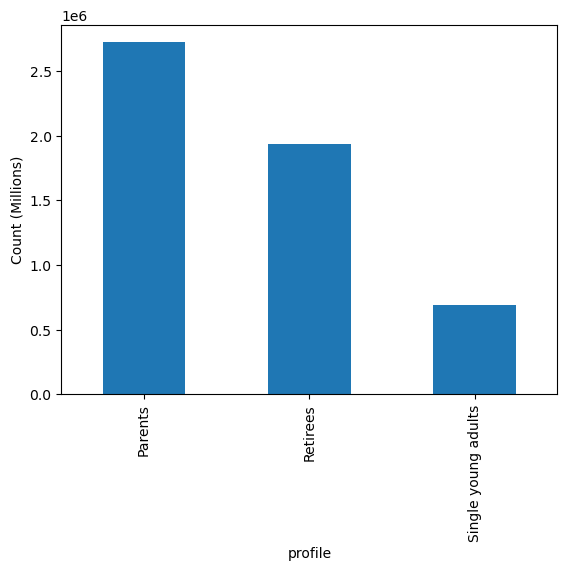

In [14]:
# Create bar plot

df['profile'].value_counts().astype(int).plot.bar()
plt.ylabel('Count (Millions)')
plt.show()

In [11]:
df['profile'].value_counts(normalize=False)

profile
Parents                2721421
Retirees               1936568
Single young adults     690810
Name: count, dtype: int64

In [24]:
# Aggregating the max,min and mean for expenditure of each customer profile

df.groupby('profile').agg({'prices': ['mean', 'min', 'max']})


prices           
                         mean  min   max
profile                                 
Parents              7.990705  1.0  20.0
Retirees             8.053929  1.0  20.0
Single young adults  7.927253  1.0  15.0

In [25]:
# Now we aggregate the same stats for usage frequency

df.groupby('profile').agg({'order_number': ['mean', 'min', 'max']})


order_number        
                            mean min max
profile                                 
Parents                17.826280   1  99
Retirees               17.583008   1  99
Single young adults    17.146453   1  99

In [26]:
# Count of profiles across regions 

df.groupby(['Region', 'profile'])['profile'].value_counts()

Region              profile            
East North Central  Parents                264827
                    Retirees               194516
                    Single young adults     71836
East South Central  Parents                208091
                    Retirees               149118
                    Single young adults     58745
Middle Atlantic     Parents                160613
                    Retirees               115471
                    Single young adults     41640
Mountain            Parents                421240
                    Retirees               310829
                    Single young adults    106307
New England         Parents                318728
                    Retirees               229345
                    Single young adults     84078
Pacific             Parents                265127
                    Retirees               190821
                    Single young adults     63164
South Atlantic      Parents                486377
          

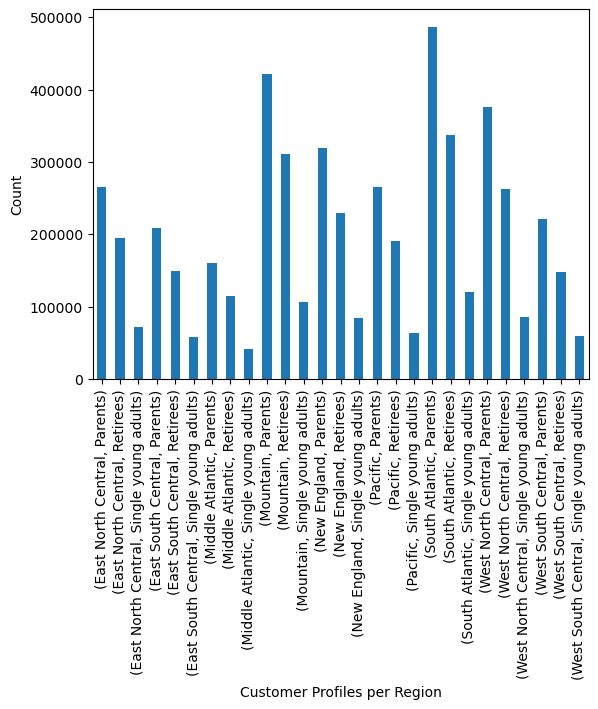

In [19]:
# Create a plot bar that illustrates the results above

df.groupby(['Region', 'profile'])['profile'].value_counts().plot.bar()
plt.xlabel('Customer Profiles per Region')  
plt.ylabel('Count')
plt.show()

In [28]:
df.groupby(['department_id', 'profile'])['profile'].value_counts()

department_id  profile            
1              Single young adults     104382
4              Parents                2188971
               Retirees               1323711
               Single young adults     460402
7              Retirees                350574
               Single young adults     126026
13             Parents                 431597
               Retirees                262283
18             Parents                 100853
Name: count, dtype: int64

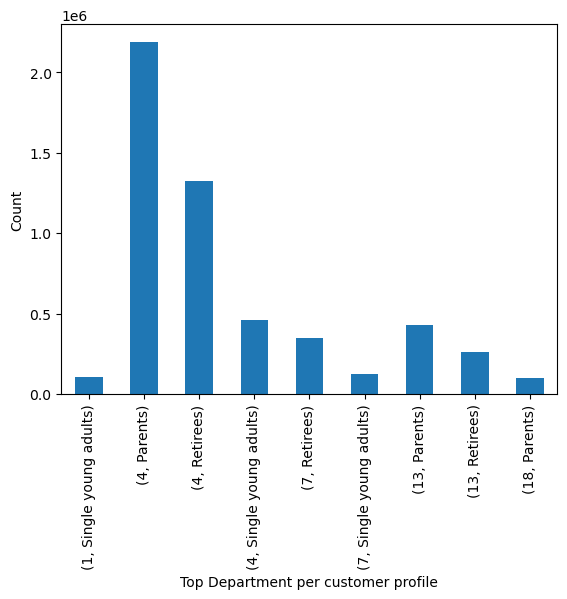

In [21]:
# Comparison of customer profiles across  departments

df.groupby(['department_id', 'profile'])['profile'].value_counts().plot.bar()
plt.xlabel('Top Department per customer profile')  
plt.ylabel('Count')
plt.show()

### See to which department does each number corresponds:
1 = Frozen
4 = Produce
7 = Beverages
13 = pantry
18 = babies
19 = snacks

In [31]:
# Completing crosstab check on our large dataframe (Customers_prods_final.pkl)

crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)


In [33]:
crosstab.to_clipboard()